In [10]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# timevae / fourierflows
model = 'fourierflows'
n_best = 9

In [12]:
# select all files ending with 'distance' or 'feature'
files = os.listdir('./TSGBench/data/' + model)
files = [file for file in files if file.endswith('distance.pkl') or file.endswith('feature.pkl')]

In [13]:
# read all files, compute mean of all values, and reshape the data
# we compute the mean because mdd and acd are reported as the values over 5 runs
# single-value metrics will not be effected by computing the average
results = []
for i,file in enumerate(files):
    with open('./TSGBench/data/' + model + '/' + file, 'rb') as file:
        data = pickle.load(file)    
    for x in data:
        results.append(np.mean(x))
results = np.array(results)
results = results.reshape(-1, 6)

In [14]:
# compute rankings 
rows, cols = results.shape
ranks = []
for i in range(cols):
    rank = results[:, i].argsort().argsort()
    ranks.append(rank)
ranks = np.array(ranks)
ranks = ranks.reshape(-1, 6)

In [15]:
# compute median rankings
medians = [np.median(rank) for rank in ranks]

In [16]:
# find n_best ranked models
min_med_rank_indices = np.argsort(medians)[:n_best]
best_models = []
for i,file in enumerate(np.array(files[::2])[min_med_rank_indices]):
    best_models.append(file.removesuffix('_eval_distance.pkl'))
    print(i+1, file.removesuffix('_eval_distance.pkl'))

1 fmri_250_15_0.001
2 fmri_150_15_0.0001
3 fmri_250_5_1e-05
4 fmri_250_10_0.001
5 fmri_200_5_0.001
6 fmri_250_5_0.001
7 fmri_150_5_0.0001
8 fmri_150_5_0.001
9 fmri_200_10_0.0001


In [17]:
def load(data):
    try:
        data = data['data']
    except:
        data = data['arr_0']
    return data

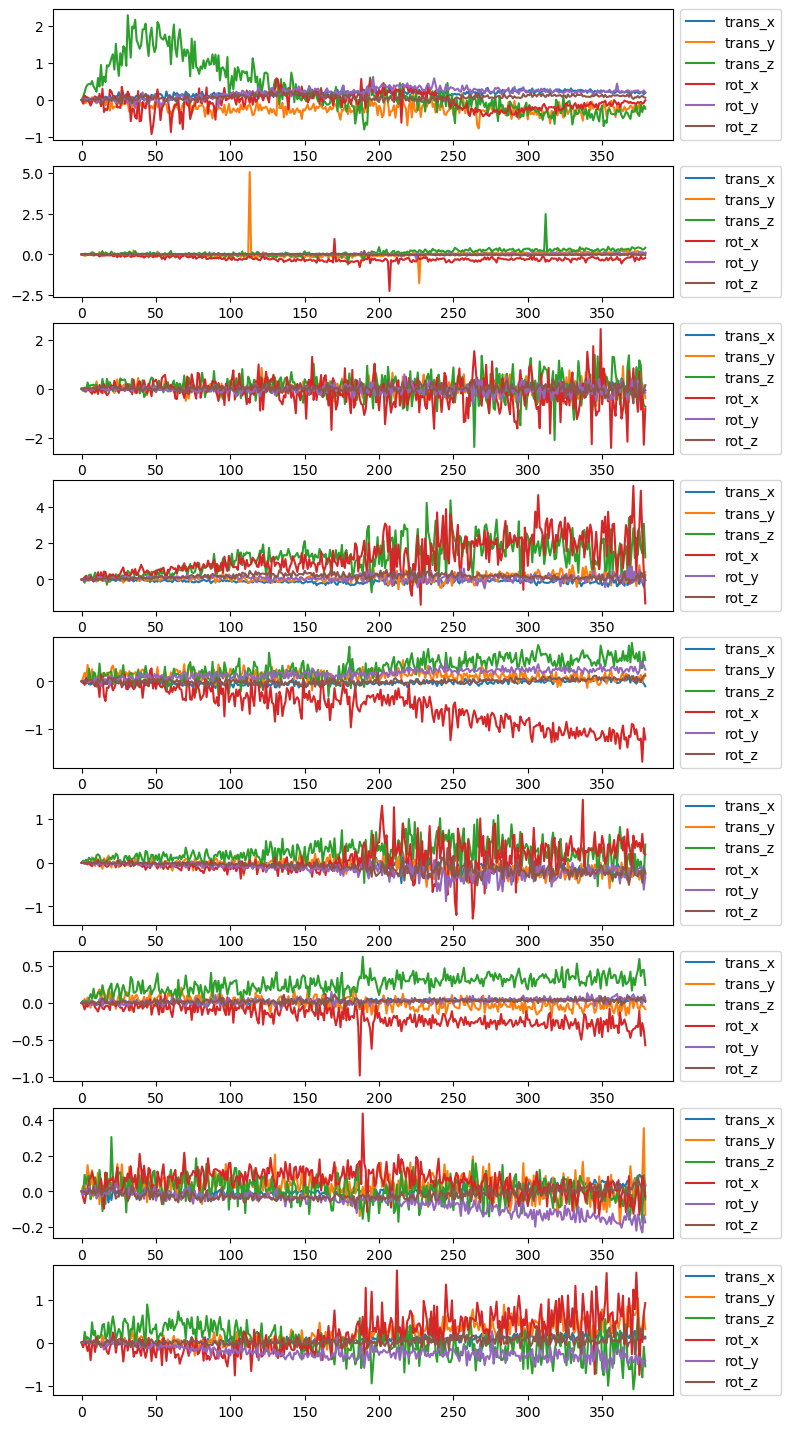

In [18]:
# plot first synthetic motion curve of each of the n_best models
fig, axs = plt.subplots(n_best, 1, figsize=(8, n_best * 2))
categories = ['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']
for i in range(n_best):
    file = f'TSGBench/data/{model}/{best_models[i]}_gen.npz'
    data = np.load(file)
    data = load(data)
    for d in range(6):
        axs[i].plot(data[0, :, d], label=categories[d])
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()